In [1]:
import pandas as pd

In [2]:
#Data file reading
try:
    pse_isr_df=pd.read_csv(r"pse_isr_reddit_comments.csv")
except Exception as e:
    print("Exception while reading file",e)

In [3]:
#Data Exploration
pse_isr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636735 entries, 0 to 636734
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_id    636735 non-null  object
 1   score         636735 non-null  int64 
 2   self_text     636733 non-null  object
 3   subreddit     636735 non-null  object
 4   created_time  636735 non-null  object
dtypes: int64(1), object(4)
memory usage: 24.3+ MB


In [4]:
pse_isr_df['self_text'].head(5)

0                                             Classic.
1    This is what i saying exactly\nOpen your huge ...
2    7/10 is the 3rd worst terrorist attack in HIST...
3                      Usually Muslims killing Muslims
4    They both want to destroy each other with no r...
Name: self_text, dtype: object

In [5]:
null_counts = pse_isr_df.isnull().sum()
print("Total number of null values in the DataFrame: ", null_counts)
pse_isr_df=pse_isr_df.dropna()
pse_isr_df.count()



Total number of null values in the DataFrame:  comment_id      0
score           0
self_text       2
subreddit       0
created_time    0
dtype: int64


comment_id      636733
score           636733
self_text       636733
subreddit       636733
created_time    636733
dtype: int64

In [6]:
#Added new column 'vote' which shows upvote and downvote for the comment based on the score.
pse_isr_df['vote']=pse_isr_df['score'].apply(lambda x: 'Upvote' if x>0 else 'Downvote')
#pse_isr_df['vote']=pse_isr_df['score'].apply(lambda x: 'Upvote' if x>0 else ('Downvote' if x<0 else 'Neutral'))
pse_isr_df.head(5)


comment_id  score                                          self_text   
0    k8klv28      1                                           Classic.  \
1    k8klqxr      1  This is what i saying exactly\nOpen your huge ...   
2    k8kln5l      1  7/10 is the 3rd worst terrorist attack in HIST...   
3    k8klm8v      1                    Usually Muslims killing Muslims   
4    k8klg6w      1  They both want to destroy each other with no r...   

         subreddit               created_time    vote  
0        worldnews  2023-11-09 23:23:46+00:00  Upvote  
1  IsraelPalestine  2023-11-09 23:22:59+00:00  Upvote  
2  IsraelPalestine  2023-11-09 23:22:16+00:00  Upvote  
3  IsraelPalestine  2023-11-09 23:22:06+00:00  Upvote  
4        worldnews  2023-11-09 23:20:57+00:00  Upvote

In [7]:
#Using Labelencoder to convert the labels of upvote as 1 and Downvote to 0.
from sklearn.preprocessing import LabelEncoder


vote = pse_isr_df['vote'].values

encoder = LabelEncoder()
encoded_vote = encoder.fit_transform(vote)
pse_isr_df['EncodedVote']=encoded_vote
pse_isr_df.head(5)

comment_id  score                                          self_text   
0    k8klv28      1                                           Classic.  \
1    k8klqxr      1  This is what i saying exactly\nOpen your huge ...   
2    k8kln5l      1  7/10 is the 3rd worst terrorist attack in HIST...   
3    k8klm8v      1                    Usually Muslims killing Muslims   
4    k8klg6w      1  They both want to destroy each other with no r...   

         subreddit               created_time    vote  EncodedVote  
0        worldnews  2023-11-09 23:23:46+00:00  Upvote            1  
1  IsraelPalestine  2023-11-09 23:22:59+00:00  Upvote            1  
2  IsraelPalestine  2023-11-09 23:22:16+00:00  Upvote            1  
3  IsraelPalestine  2023-11-09 23:22:06+00:00  Upvote            1  
4        worldnews  2023-11-09 23:20:57+00:00  Upvote            1

In [8]:
#Check whether the data is balanced or not
pse_isr_df['EncodedVote'].value_counts()

#Data is highly imbalanced

EncodedVote
1    555714
0     81019
Name: count, dtype: int64

In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import nltk
import re
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [13]:
#Data Cleaning before model building

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    
    # Remove special characters and lowercase the text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization and removing stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join the tokens back into a sentence
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


pse_isr_df['clean_text'] = pse_isr_df['self_text'].apply(clean_text)
pse_isr_df['clean_text']

C:\Users\Dell\AppData\Local\Temp\ipykernel_9644\1385073975.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


0                                                   classic
1         saying exactly open huge list see hundred terr...
2         710 3rd worst terrorist attack history also wo...
3                             usually muslim killing muslim
4         want destroy regard human life radical side bo...
                                ...                        
636730                                           u bullshit
636731    united state dotted west bank gaza strip altho...
636732    country sometimes map adapt country view matte...
636733    cant give something pretended support cynical ...
636734    head islamic jihad denounced arab attempt norm...
Name: clean_text, Length: 636733, dtype: object

In [14]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


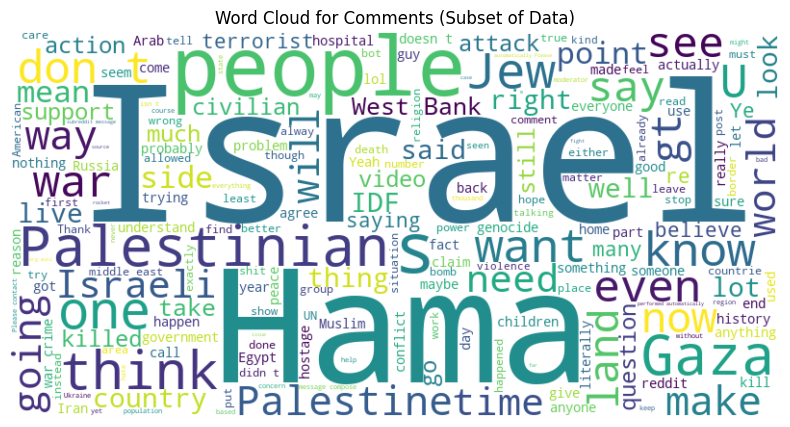

In [15]:
# adding a word cloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt

subset_text = ' '.join(pse_isr_df['self_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subset_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments (Subset of Data)')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(pse_isr_df['clean_text'])
y = pse_isr_df['vote']

In [18]:
pse_isr_df['clean_text']

0                                                   classic
1         saying exactly open huge list see hundred terr...
2         710 3rd worst terrorist attack history also wo...
3                             usually muslim killing muslim
4         want destroy regard human life radical side bo...
                                ...                        
636730                                           u bullshit
636731    united state dotted west bank gaza strip altho...
636732    country sometimes map adapt country view matte...
636733    cant give something pretended support cynical ...
636734    head islamic jihad denounced arab attempt norm...
Name: clean_text, Length: 636733, dtype: object

In [19]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Model Training
clf = RandomForestClassifier(n_estimators=50, min_samples_split=4, min_samples_leaf=2, n_jobs=-1, random_state=42)
clf.fit(X_train_sm, y_train_sm)

# Making Predictions
y_pred = clf.predict(X_test)

In [21]:
n_samples_to_view = 5 
print(X_train[:n_samples_to_view])

  (0, 4550)	0.4675084815665071
  (0, 3349)	0.5052164273879607
  (0, 1546)	0.3650426192075134
  (0, 285)	0.3609362036710594
  (0, 2292)	0.2829155902530651
  (0, 4067)	0.31594487711872465
  (0, 3956)	0.2877476804712069
  (1, 3906)	0.504193748129786
  (1, 3110)	0.3473499270157955
  (1, 3800)	0.35376736172549167
  (1, 3047)	0.48776407592931553
  (1, 381)	0.42447776009065247
  (1, 943)	0.28616460953092676
  (2, 244)	0.8984899875189459
  (2, 2604)	0.4389940117224885
  (3, 556)	0.1926613290781724
  (3, 4529)	0.1877482321786357
  (3, 4171)	0.5379519768345586
  (3, 2902)	0.30034258764377175
  (3, 905)	0.1668001821499256
  (3, 286)	0.1621649230228598
  (3, 3259)	0.17640924353807508
  (3, 1133)	0.15082519271058756
  (3, 3451)	0.16044589639836407
  (3, 668)	0.13949320859765993
  (3, 730)	0.121490862775483
  (3, 4069)	0.18429569998624795
  (3, 3396)	0.14753329233673826
  (3, 1109)	0.15562262868225596
  (3, 1131)	0.11023200748273419
  (3, 154)	0.17205469175393115
  (3, 3112)	0.12683702157237933
  (3

In [22]:

# dont run, use only to show output. 
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  
from collections import Counter

print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE()
Xtrain_sm, ytrain_sm = smote.fit_resample(X_train, y_train)

# Display the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(ytrain_sm))
 

Class distribution before SMOTE: Counter({'Upvote': 389001, 'Downvote': 56712})
Class distribution after SMOTE: Counter({'Upvote': 389001, 'Downvote': 389001})


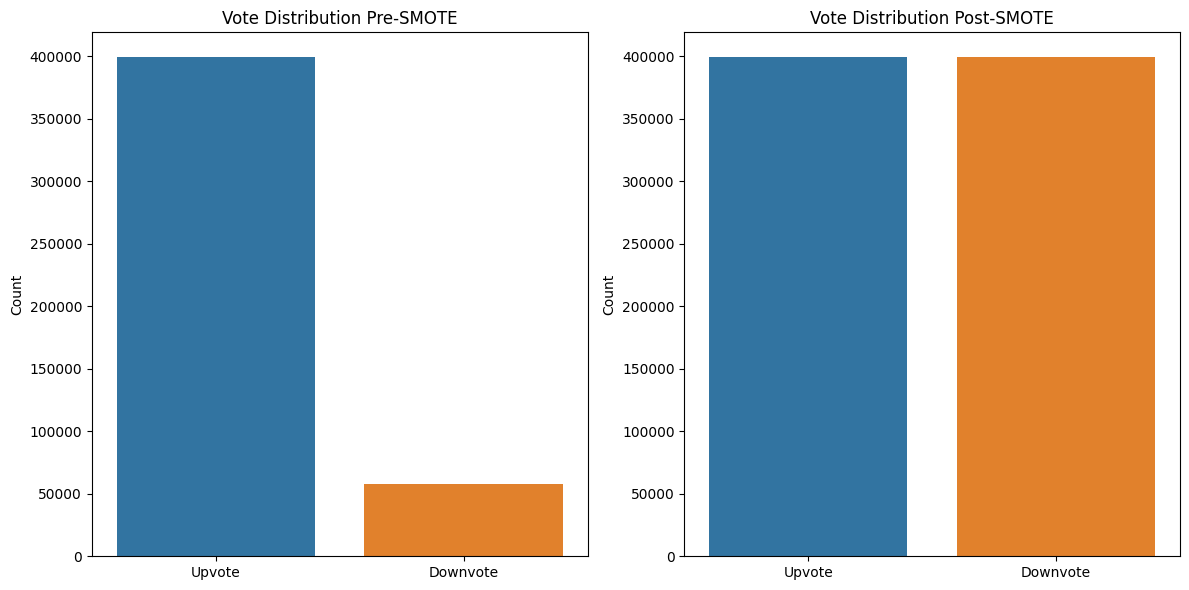

In [23]:

import seaborn as sns

votes_pre_smote = {"Upvote": 399104, "Downvote": 57919}
votes_post_smote = {"Upvote": 399104, "Downvote": 399104}


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pre SMOTE
sns.barplot(x=list(votes_pre_smote.keys()), y=list(votes_pre_smote.values()), ax=ax[0])
ax[0].set_title('Vote Distribution Pre-SMOTE')
ax[0].set_ylabel('Count')

# Post SMOTE
sns.barplot(x=list(votes_post_smote.keys()), y=list(votes_post_smote.values()), ax=ax[1])
ax[1].set_title('Vote Distribution Post-SMOTE')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [24]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{conf_matrix}')

Accuracy: 0.8246885142916972
Classification Report: 
              precision    recall  f1-score   support

    Downvote       0.15      0.08      0.11     24307
      Upvote       0.87      0.93      0.90    166713

    accuracy                           0.82    191020
   macro avg       0.51      0.51      0.51    191020
weighted avg       0.78      0.82      0.80    191020

Confusion Matrix: 
[[  2040  22267]
 [ 11221 155492]]


In [25]:
msg = input("Enter Message: ")
preprocessed_msg = clean_text(msg)

msg_input = vectorizer.transform([preprocessed_msg])
predict = clf.predict(msg_input)

if predict[0] == 'Upvote':
    print("Likely to get an Upvote")
else:
    print("Likely to get a Downvote")


probabilities = clf.predict_proba(msg_input)

# Assuming the second class corresponds to 'Upvote'
# and the first class corresponds to 'Downvote'
upvote_probability = probabilities[0][1] * 100
downvote_probability = probabilities[0][0] * 100

# Displaying the results
print(f"Probability of getting an Upvote: {upvote_probability:.2f}%")
print(f"Probability of getting a Downvote: {downvote_probability:.2f}%")

Likely to get an Upvote
Probability of getting an Upvote: 55.14%
Probability of getting a Downvote: 44.86%


In [36]:
# saving th model

from joblib import dump

dump(clf, 'reddit_upvote_downvote_model.joblib') #save model
dump(vectorizer, 'tfidf_vectorizer.joblib') # saving vectors

['tfidf_vectorizer.joblib']

In [27]:
import lime
import lime.lime_tabular

In [28]:
from lime import lime_tabular

# Assuming X_train is a sparse matrix
# Create the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    X_train,  # Use the original sparse matrix here
    mode='regression', 
    feature_names=None,  # Set feature_names to None, as LimeTabularExplainer can handle sparse matrices
    class_names=['MEDV'], 
    verbose=True,
    discretize_continuous=False  # Important: Do not discretize for sparse data
)


In [33]:
# Choose a random instance from the test set for explanation
import numpy as np
#instance_idx = np.random.randint(0, X_test.shape[0])
instance_idx=5
instance_to_explain = X_test[instance_idx]

# Get the model's prediction for the instance
prediction = clf.predict_proba(instance_to_explain.reshape(1, -1))

# Explain the prediction using LIME
exp = explainer.explain_instance(instance_to_explain, clf.predict_proba, num_features=X_train.shape[1])

# Display the explanation
exp.show_in_notebook(show_all=False)


Intercept 0.8657528326951538
Prediction_local [0.88985921]
Right: 0.35626794091883673


In [34]:
# Choose a random instance from the test set for explanation
import numpy as np
#instance_idx = np.random.randint(0, X_test.shape[0])
instance_idx=10
instance_to_explain = X_test[instance_idx]

# Get the model's prediction for the instance
prediction = clf.predict_proba(instance_to_explain.reshape(1, -1))

# Explain the prediction using LIME
exp = explainer.explain_instance(instance_to_explain, clf.predict_proba, num_features=X_train.shape[1])

# Display the explanation
exp.show_in_notebook(show_all=False)


Intercept 0.9431082894953682
Prediction_local [0.94520923]
Right: 0.638900390911905


In [35]:
# Choose a random instance from the test set for explanation
import numpy as np
#instance_idx = np.random.randint(0, X_test.shape[0])
instance_idx=20
instance_to_explain = X_test[instance_idx]

# Get the model's prediction for the instance
prediction = clf.predict_proba(instance_to_explain.reshape(1, -1))

# Explain the prediction using LIME
exp = explainer.explain_instance(instance_to_explain, clf.predict_proba, num_features=X_train.shape[1])

# Display the explanation
exp.show_in_notebook(show_all=False)

Intercept 0.9676587272958529
Prediction_local [0.9660773]
Right: 0.46968932962115234
